# Genotype Risk Analysis Program

This program plots the area under filtered blide slide prevalence curve, by specific genotype(s) to show their risk.

## Parser Function
This is the parser function, taken directly from `BoniLabMDR` file.

In [0]:
import pandas as pd
# Source: https://thispointer.com/python-how-to-insert-lines-at-the-top-of-a-file/
'''
Default columns that are selected are:
 #0 - Current Time
 #2 - Year
 #8 - Population
 #12 - Blood Slide Prevalence
 #22-149 - Parasite Count by Genotypes
'''

def parse(file_name, interested_col = [0,2,8,12] + list(range(22,150))):
  headline = "current_time\tsclock_to_time\tyear\tmonth\tday\tseasonal_fac\ttreated_p_5-\ttreated_p_5+\tpopulation\tsep\tEIR_loc_yr\tsep\tblood_slide_prev\tbsp_2_10\tbsp_0_5\tsep\tmonthly_new_inf\tsep\tmon_treatment\tsep\tmon_clinical_ep\tsep\tKNY--C1x\tKNY--C1X\tKNY--C2x\tKNY--C2X\tKNY--Y1x\tKNY--Y1X\tKNY--Y2x\tKNY--Y2X\tKYY--C1x\tKYY--C1X\tKYY--C2x\tKYY--C2X\tKYY--Y1x\tKYY--Y1X\tKYY--Y2x\tKYY--Y2X\tKNF--C1x\tKNF--C1X\tKNF--C2x\tKNF--C2X\tKNF--Y1x\tKNF--Y1X\tKNF--Y2x\tKNF--Y2X\tKYF--C1x\tKYF--C1X\tKYF--C2x\tKYF--C2X\tKYF--Y1x\tKYF--Y1X\tKYF--Y2x\tKYF--Y2X\tKNYNYC1x\tKNYNYC1X\tKNYNYC2x\tKNYNYC2X\tKNYNYY1x\tKNYNYY1X\tKNYNYY2x\tKNYNYY2X\tKYYYYC1x\tKYYYYC1X\tKYYYYC2x\tKYYYYC2X\tKYYYYY1x\tKYYYYY1X\tKYYYYY2x\tKYYYYY2X\tKNFNFC1x\tKNFNFC1X\tKNFNFC2x\tKNFNFC2X\tKNFNFY1x\tKNFNFY1X\tKNFNFY2x\tKNFNFY2X\tKYFYFC1x\tKYFYFC1X\tKYFYFC2x\tKYFYFC2X\tKYFYFY1x\tKYFYFY1X\tKYFYFY2x\tKYFYFY2X\tTNY--C1x\tTNY--C1X\tTNY--C2x\tTNY--C2X\tTNY--Y1x\tTNY--Y1X\tTNY--Y2x\tTNY--Y2X\tTYY--C1x\tTYY--C1X\tTYY--C2x\tTYY--C2X\tTYY--Y1x\tTYY--Y1X\tTYY--Y2x\tTYY--Y2X\tTNF--C1x\tTNF--C1X\tTNF--C2x\tTNF--C2X\tTNF--Y1x\tTNF--Y1X\tTNF--Y2x\tTNF--Y2X\tTYF--C1x\tTYF--C1X\tTYF--C2x\tTYF--C2X\tTYF--Y1x\tTYF--Y1X\tTYF--Y2x\tTYF--Y2X\tTNYNYC1x\tTNYNYC1X\tTNYNYC2x\tTNYNYC2X\tTNYNYY1x\tTNYNYY1X\tTNYNYY2x\tTNYNYY2X\tTYYYYC1x\tTYYYYC1X\tTYYYYC2x\tTYYYYC2X\tTYYYYY1x\tTYYYYY1X\tTYYYYY2x\tTYYYYY2X\tTNFNFC1x\tTNFNFC1X\tTNFNFC2x\tTNFNFC2X\tTNFNFY1x\tTNFNFY1X\tTNFNFY2x\tTNFNFY2X\tTYFYFC1x\tTYFYFC1X\tTYFYFC2x\tTYFYFC2X\tTYFYFY1x\tTYFYFY1X\tTYFYFY2x\tTYFYFY2X\tsep\tKNY--C1x\tKNY--C1X\tKNY--C2x\tKNY--C2X\tKNY--Y1x\tKNY--Y1X\tKNY--Y2x\tKNY--Y2X\tKYY--C1x\tKYY--C1X\tKYY--C2x\tKYY--C2X\tKYY--Y1x\tKYY--Y1X\tKYY--Y2x\tKYY--Y2X\tKNF--C1x\tKNF--C1X\tKNF--C2x\tKNF--C2X\tKNF--Y1x\tKNF--Y1X\tKNF--Y2x\tKNF--Y2X\tKYF--C1x\tKYF--C1X\tKYF--C2x\tKYF--C2X\tKYF--Y1x\tKYF--Y1X\tKYF--Y2x\tKYF--Y2X\tKNYNYC1x\tKNYNYC1X\tKNYNYC2x\tKNYNYC2X\tKNYNYY1x\tKNYNYY1X\tKNYNYY2x\tKNYNYY2X\tKYYYYC1x\tKYYYYC1X\tKYYYYC2x\tKYYYYC2X\tKYYYYY1x\tKYYYYY1X\tKYYYYY2x\tKYYYYY2X\tKNFNFC1x\tKNFNFC1X\tKNFNFC2x\tKNFNFC2X\tKNFNFY1x\tKNFNFY1X\tKNFNFY2x\tKNFNFY2X\tKYFYFC1x\tKYFYFC1X\tKYFYFC2x\tKYFYFC2X\tKYFYFY1x\tKYFYFY1X\tKYFYFY2x\tKYFYFY2X\tTNY--C1x\tTNY--C1X\tTNY--C2x\tTNY--C2X\tTNY--Y1x\tTNY--Y1X\tTNY--Y2x\tTNY--Y2X\tTYY--C1x\tTYY--C1X\tTYY--C2x\tTYY--C2X\tTYY--Y1x\tTYY--Y1X\tTYY--Y2x\tTYY--Y2X\tTNF--C1x\tTNF--C1X\tTNF--C2x\tTNF--C2X\tTNF--Y1x\tTNF--Y1X\tTNF--Y2x\tTNF--Y2X\tTYF--C1x\tTYF--C1X\tTYF--C2x\tTYF--C2X\tTYF--Y1x\tTYF--Y1X\tTYF--Y2x\tTYF--Y2X\tTNYNYC1x\tTNYNYC1X\tTNYNYC2x\tTNYNYC2X\tTNYNYY1x\tTNYNYY1X\tTNYNYY2x\tTNYNYY2X\tTYYYYC1x\tTYYYYC1X\tTYYYYC2x\tTYYYYC2X\tTYYYYY1x\tTYYYYY1X\tTYYYYY2x\tTYYYYY2X\tTNFNFC1x\tTNFNFC1X\tTNFNFC2x\tTNFNFC2X\tTNFNFY1x\tTNFNFY1X\tTNFNFY2x\tTNFNFY2X\tTYFYFC1x\tTYFYFC1X\tTYFYFC2x\tTYFYFC2X\tTYFYFY1x\tTYFYFY1X\tTYFYFY2x\tTYFYFY2X\tsep\t\t"
  
  # Start - Cited Codes
  # define name of temporary dummy file
  dummy_file = file_name[:-4] + '_parsed.txt'
  # open original file in read mode and dummy file in write mode
  with open(file_name, 'r') as read_obj, open(dummy_file, 'w') as write_obj:
    # Write given line to the dummy file
    write_obj.write(headline + '\n')
    # Read lines from original file one by one and append them to the dummy file
    for line in read_obj:
      write_obj.write(line)
  # End - Cited Codes

  df = pd.read_csv(dummy_file, sep='\t')

  # Check if file is single-location'd
  if len(df.columns) == 282:
    # Return tailored df
    df = df.iloc[:,interested_col]
    return df
  
  # Error if file not single-location'd
  return None

## Main Function - Start Here

This part defines some variables first, then plot a diagram of selected blood slide prevalence against time, with selected areas under the curve shaded.

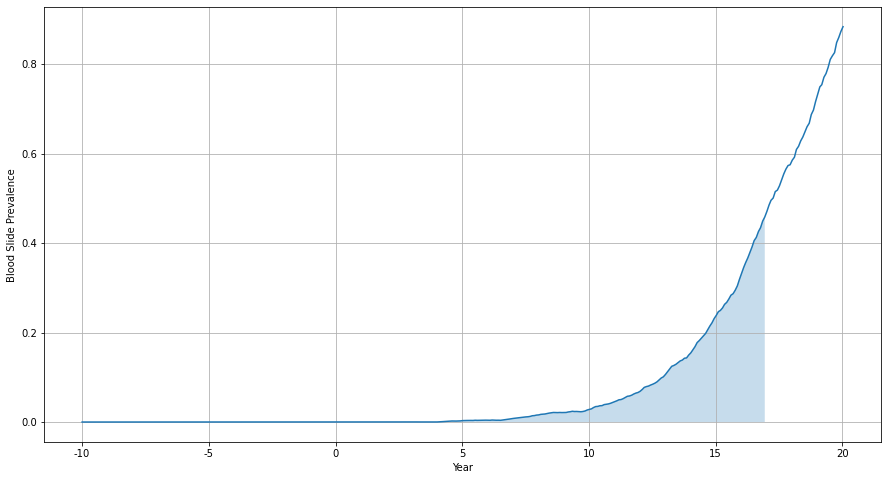

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# user defined variables
filepath='2.txt'
startyear=10 # exclude burn-in
endyear = 27
title=''
xlabel='Year'
ylabel='Blood Slide Prevalence'
burnin_year = 10

# parse the output file
df = parse(file_name=filepath)

# estimate bsp (people infected) by epecific genotype(s)
df['bsp_portion'] = df['blood_slide_prev'] * df.filter(regex='TYY..Y2.', axis=1).sum(axis=1)

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.rcParams['figure.figsize'] = [15, 8]
ax = fig.add_subplot(111)
scale_x = 365
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format((x-burnin_year*365)/scale_x))

ax.plot(df['current_time'], df['bsp_portion'])
ax.fill_between(df['current_time'], df['bsp_portion'], 
                where=((startyear*365<df['current_time']) & (df['current_time']<endyear*365)), 
                alpha=0.25)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5*scale_x)) # 5-year mark
ax.xaxis.set_major_formatter(ticks_x)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(title)
ax.grid()

Then this part uses `np.trapz` to calculate quantity of the selected area.

In [0]:
import numpy as np

df2 = df.copy()
df2['people'] = df2['population'] * df['bsp_portion'] / 100
# select target years and columns
# people
yaxis = df2.loc[(startyear*365<df2['current_time']) & (df2['current_time']<endyear*365)]['population'].values
xaxis = df2.loc[(startyear*365<df2['current_time']) & (df2['current_time']<endyear*365)]['current_time'].values
area = np.trapz(yaxis, x=xaxis)

In [5]:
area

10314712931.5